In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
import scipy.optimize as op

hfont = {'fontname':'Times New roman'}

In [3]:
# real as real
min_sn = np.array([ 0.0,  1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0])
max_sn = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0, 12.0, 14.0, 18.0, 22.0, 30.0, 38.0])


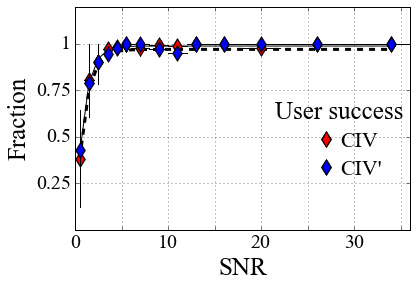

In [7]:
# plot the data
# x, y labels and title
plt.ylabel('Fraction', **hfont,  fontsize=25)
plt.xlabel('SNR', **hfont,  fontsize=25)
#plt.title('User success', **hfont,  fontsize=25)

# x and y ranges and scale
plt.xlim([0, 36])
plt.ylim([0,1.2])
value = np.array([0.383202,0.804107,0.901429,0.971258,0.981154, 1.0,
                  0.978355,0.992481,0.988889, 1.00000,0.997368,0.980000, 1.00000,0.999091])
mid_sn = min_sn + (max_sn - min_sn)/2.0
fit_mid_sn = mid_sn
z = 1.96


n = np.array([762, 633, 420, 336, 208, 144, 231, 133,  90,  52,  57,  25,   8,  11])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

f  =  0.97 *(1.0 - np.exp(-fit_mid_sn/0.993))
plt.plot(fit_mid_sn, f, 'k--', lw = 3, alpha = 1)

f  = 0.988*(1.0 - np.exp(-fit_mid_sn/0.93))
plt.plot(fit_mid_sn, f, 'k-', lw = 1, alpha = 1)


# x and y ticks
xlabels = ['0', ' ', '10', ' ', '20', ' ', '30']
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35], 
            xlabels, **hfont, fontsize = 20)
ylabels = [' ', '0.25', '0.5', '0.75', '1']
plt.yticks([0, 0.25, 0.5, 0.75, 1.0], 
            ylabels, **hfont, fontsize = 20)

plt.grid(True)


# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'rd', markersize=10, alpha=1.0)   


value = np.array([0.430622,  0.789855,  0.900901,  0.943662,  0.979167,  
                  1.00000,   1.00000,  0.971429,  0.952381,   1.00000,   
                  1.00000,   1.00000,   1.00000,   1.00000])
n = np.array([209, 138, 111,  71,  48,  40,  81,  35,  21,  14,   9,   8,   2,   2])
ns = n*value
nf = n - ns
error = z*pow(ns*nf/n, 0.5)/100.0
error[np.where(error < 0.001)] = 0.001
upper_bound = value + error
lower_bound = value - error
upper_bound[np.where(upper_bound > 1.0)] = 1.0

# plot the vertical error bounds    
for i in range(0, len(min_sn)):
    plt.plot([mid_sn[i], mid_sn[i]], [upper_bound[i], lower_bound[i]], 'k-', lw=1.0)

# plot the bin boundaries
for i in range(0, len(min_sn)):
    plt.plot([min_sn[i], max_sn[i]], [value[i], value[i]], 'k-', lw=1.0)

    
# plot the results
plt.plot(mid_sn, value, 'kd', markersize=12, alpha=1.0)  
plt.plot(mid_sn, value, 'bd', markersize=10, alpha=1.0)   



txt = plt.text(28.5, 0.45, "CIV", **hfont,  fontsize=22)
plt.plot([27., 27.], [0.49, 0.49], 'kd', markersize=12, alpha=1.0)  
plt.plot([27., 27.], [0.49, 0.49], 'rd', markersize=10, alpha=1.0)   

txt = plt.text(28.5, 0.30, "CIV'", **hfont,  fontsize=22)
plt.plot([27., 27.], [0.34, 0.34], 'kd', markersize=12, alpha=1.0)  
plt.plot([27., 27.], [0.34, 0.34], 'bd', markersize=10, alpha=1.0)   

txt = plt.text(21.5, 0.6, "User success", **hfont,  fontsize=25)






plt.savefig('c4_all_real_as_real.png', bbox_inches='tight', figsize=[24,12], dpi=500)